<a href="https://colab.research.google.com/github/Nayeemhabib/Machine_Learning_Projects/blob/main/Machine_Learning_Projects%5CPrediction_of_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the important libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

<ipython-input-1-efe2b067789e>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
# Loading all the three datasets
from google.colab import files
uploaded = files.upload()
confirmed_cases = pd.read_csv('time_series_covid-19_deaths.csv')

Saving time_series_covid-19_deaths.csv to time_series_covid-19_deaths.csv


In [6]:
from google.colab import files
uploaded = files.upload()
deaths_reported = pd.read_csv('time_series_covid-19_confirmed.csv')

Saving time_series_covid-19_confirmed.csv to time_series_covid-19_confirmed.csv


In [7]:
from google.colab import files
uploaded = files.upload()
recovered_cases = pd.read_csv('time_series_covid-19_recovered.csv')

Saving time_series_covid-19_recovered.csv to time_series_covid-19_recovered.csv


In [10]:
# Display the head of the dataset

confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [9]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [11]:
# Extracting all the columns using the .keys() function

cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [12]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases

confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [13]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]


In [14]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [15]:
# Check the head of the outbreak cases

confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [17]:
# Let's display each of the newly created variables

confirmed_sum

6440

In [18]:
death_sum

167449

In [19]:
recovered_sum

76034

In [20]:
world_cases

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3348,
 3460,
 3558,
 3802,
 3988,
 4262,
 4615,
 4720,
 5404,
 5819,
 6440]

In [30]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [22]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [23]:
world_cases

array([[  17],
       [  18],
       [  26],
       [  42],
       [  56],
       [  82],
       [ 131],
       [ 133],
       [ 171],
       [ 213],
       [ 259],
       [ 362],
       [ 426],
       [ 492],
       [ 564],
       [ 634],
       [ 719],
       [ 806],
       [ 906],
       [1013],
       [1113],
       [1118],
       [1371],
       [1523],
       [1666],
       [1770],
       [1868],
       [2007],
       [2122],
       [2247],
       [2251],
       [2458],
       [2469],
       [2629],
       [2708],
       [2770],
       [2814],
       [2872],
       [2941],
       [2996],
       [3085],
       [3160],
       [3254],
       [3348],
       [3460],
       [3558],
       [3802],
       [3988],
       [4262],
       [4615],
       [4720],
       [5404],
       [5819],
       [6440]])

In [24]:
total_deaths

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156097],
       [167449]])

In [25]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034]])

In [26]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [31]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [35]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast_dates)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [33]:
# For visualization with the latest data of 15th of march

latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [36]:
latest_confirmed

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [37]:
latest_deaths

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [38]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [39]:
# Find the list of unique countries

unique_countries =  list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [40]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [41]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 3203 cases
Italy: 1809 cases
Iran: 724 cases
Spain: 289 cases
France: 91 cases
Korea, South: 75 cases
US: 63 cases
Japan: 22 cases
United Kingdom: 21 cases
Netherlands: 20 cases
Switzerland: 14 cases
Germany: 11 cases
Philippines: 11 cases
Iraq: 10 cases
Cruise Ship: 7 cases
San Marino: 5 cases
Iceland: 5 cases
Indonesia: 5 cases
Belgium: 4 cases
Algeria: 4 cases
Greece: 4 cases
Australia: 3 cases
Sweden: 3 cases
Lebanon: 3 cases
Norway: 3 cases
Poland: 3 cases
India: 2 cases
Egypt: 2 cases
Ireland: 2 cases
Ecuador: 2 cases
Argentina: 2 cases
Bulgaria: 2 cases
Denmark: 2 cases
Thailand: 1 cases
Canada: 1 cases
Austria: 1 cases
Luxembourg: 1 cases
Azerbaijan: 1 cases
Morocco: 1 cases
Ukraine: 1 cases
Hungary: 1 cases
Slovenia: 1 cases
Albania: 1 cases
Panama: 1 cases
Taiwan*: 1 cases
Guyana: 1 cases
Sudan: 1 cases


In [42]:
# Find the list of unique provinces

unique_provinces =  list(confirmed_cases['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [43]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for i in no_cases:
    unique_provinces.remove(i)

In [44]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 1 cases
New South Wales: 2 cases
Western Australia: 1 cases
Washington: 40 cases
New York: 3 cases
California: 6 cases
Diamond Princess: 7 cases
Georgia: 1 cases
Colorado: 1 cases
Florida: 4 cases
New Jersey: 2 cases
Oregon: 1 cases
Virginia: 1 cases
Kansas: 1 cases
Louisiana: 2 cases
South Dakota: 1 cases
Hubei: 3085 cases
Guangdong: 8 cases
Henan: 22 cases
Zhejiang: 1 cases
Hunan: 4 cases
Anhui: 6 cases
Jiangxi: 1 cases
Shandong: 7 cases
Chongqing: 6 cases
Sichuan: 3 cases
Heilongjiang: 13 cases
Beijing: 8 cases
Shanghai: 3 cases
Hebei: 6 cases
Fujian: 1 cases
Guangxi: 2 cases
Shaanxi: 2 cases
Yunnan: 2 cases
Hainan: 6 cases
Guizhou: 2 cases
Tianjin: 3 cases
Gansu: 2 cases
Hong Kong: 4 cases
Liaoning: 1 cases
Jilin: 1 cases
Xinjiang: 3 cases
Inner Mongolia: 1 cases


In [45]:
# handling nan values if there is any

nan_indices = [] 


for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

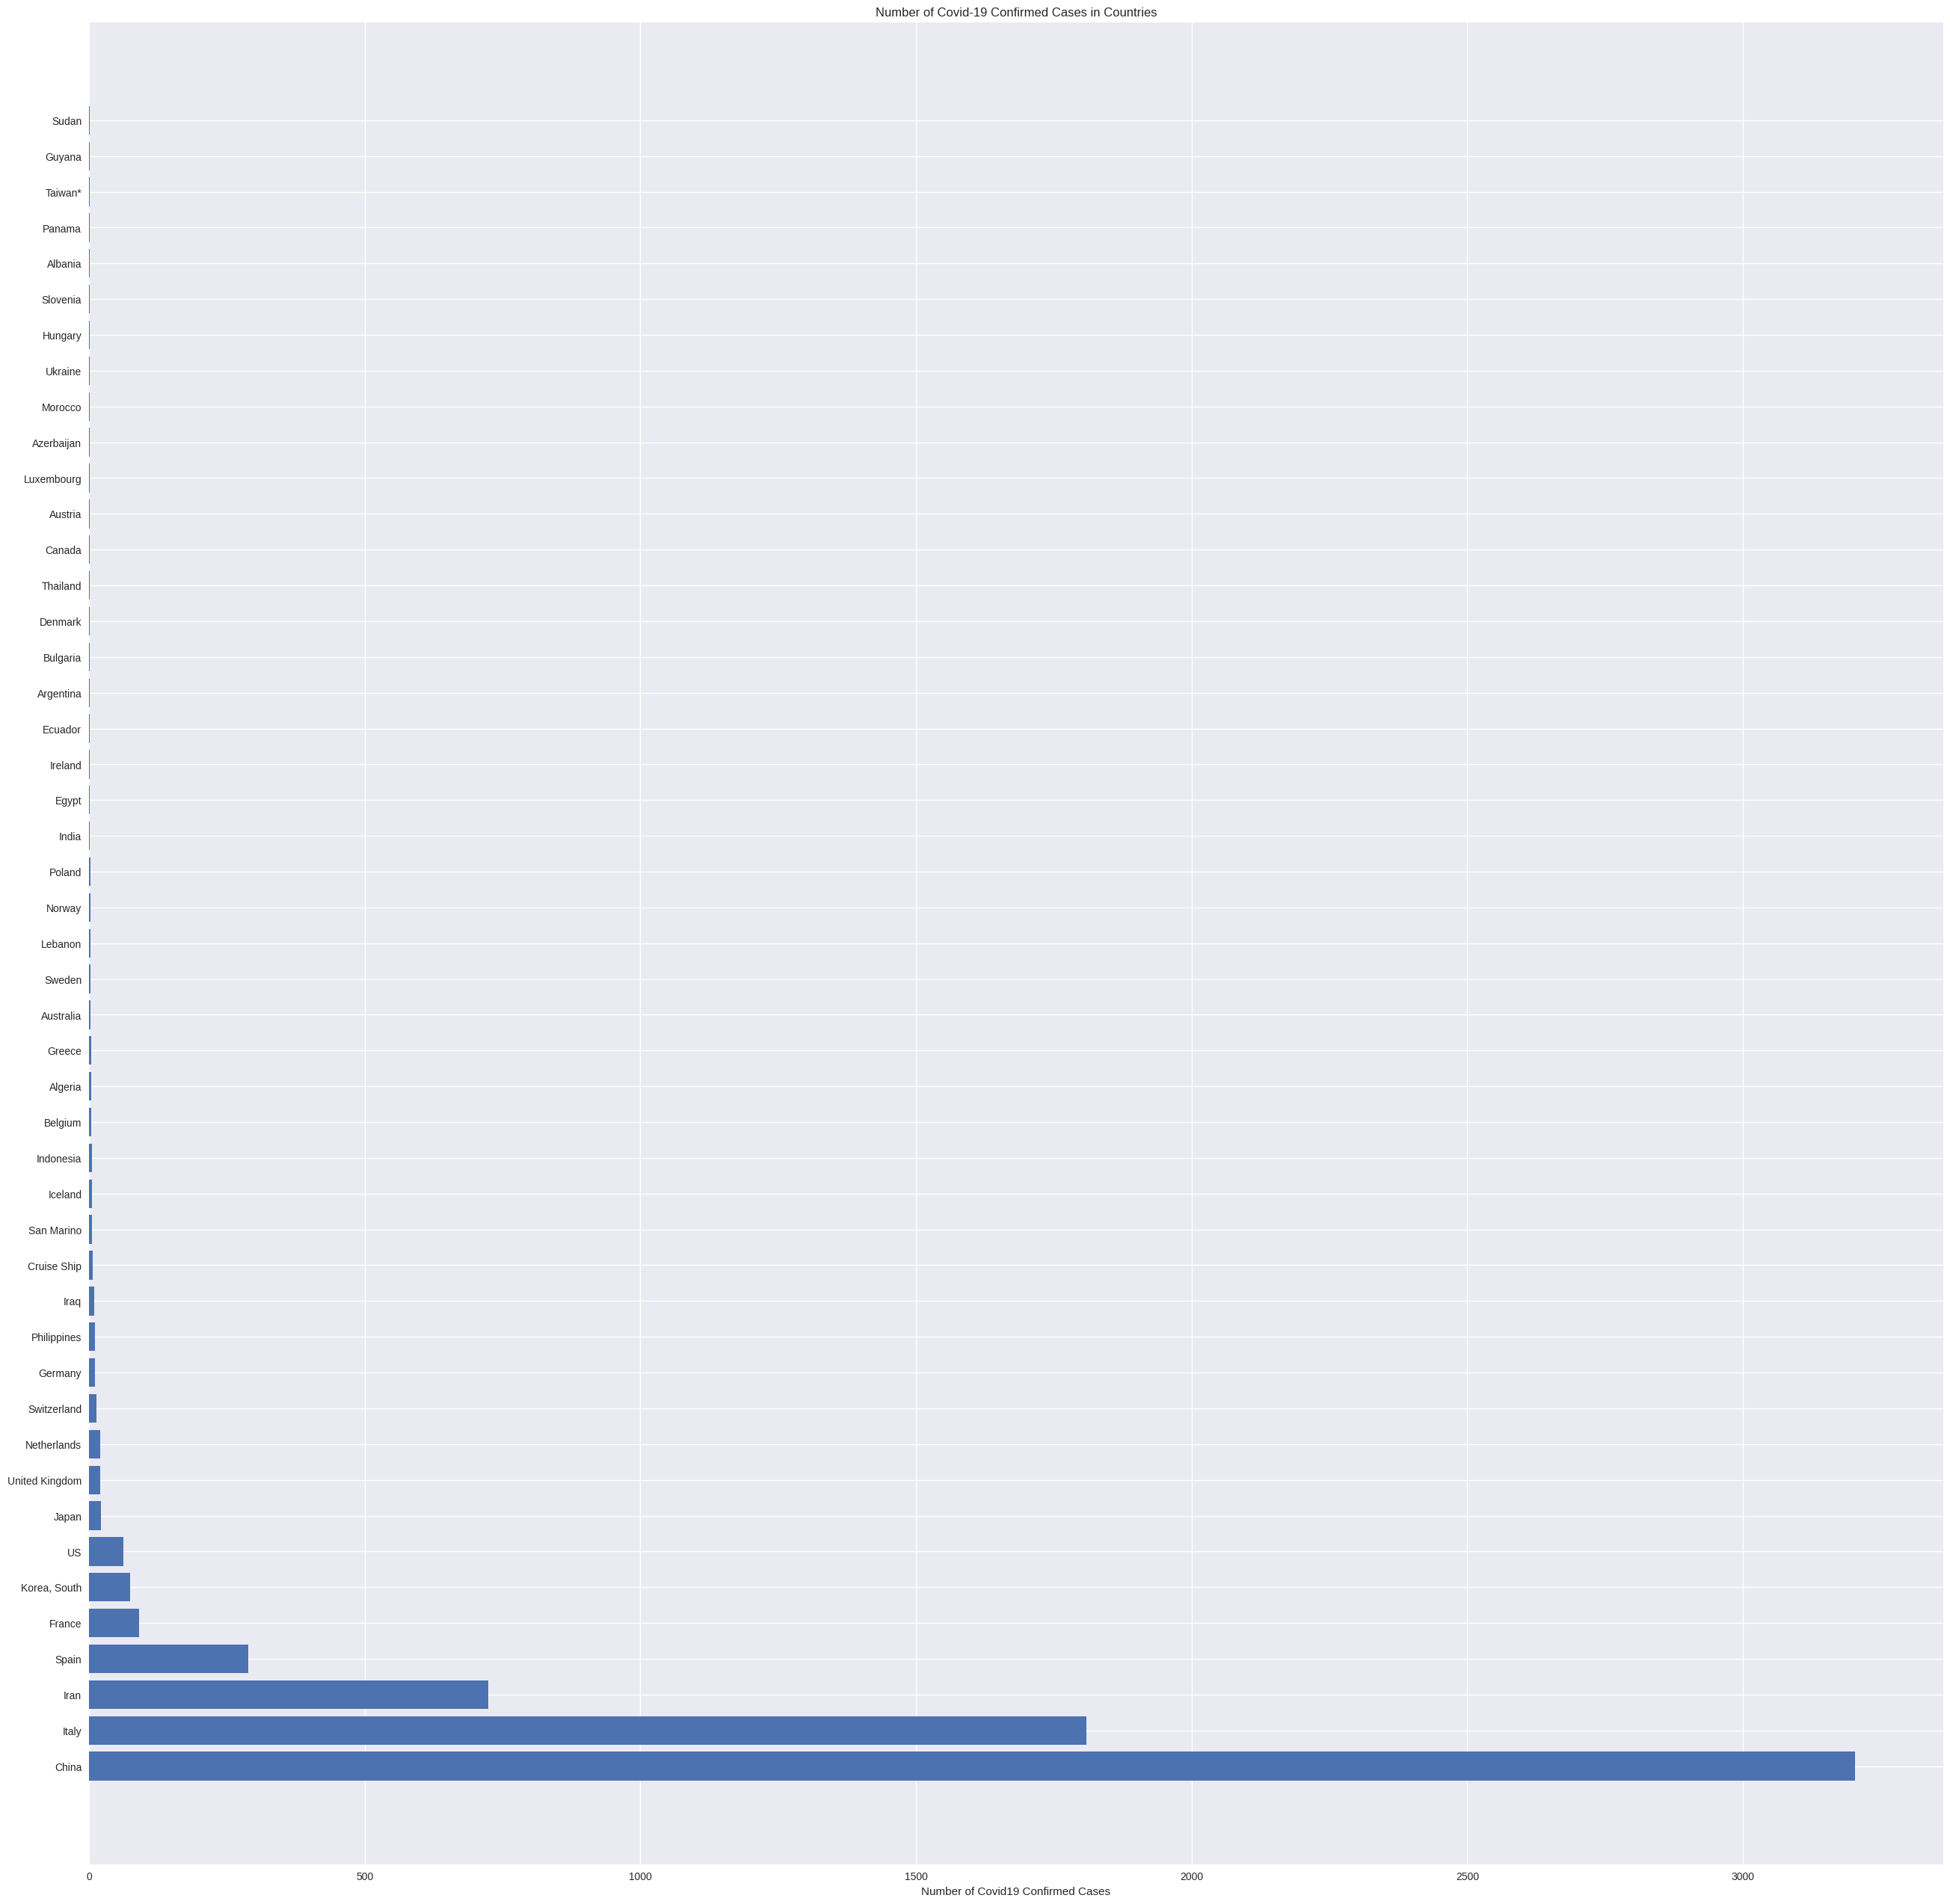

In [46]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

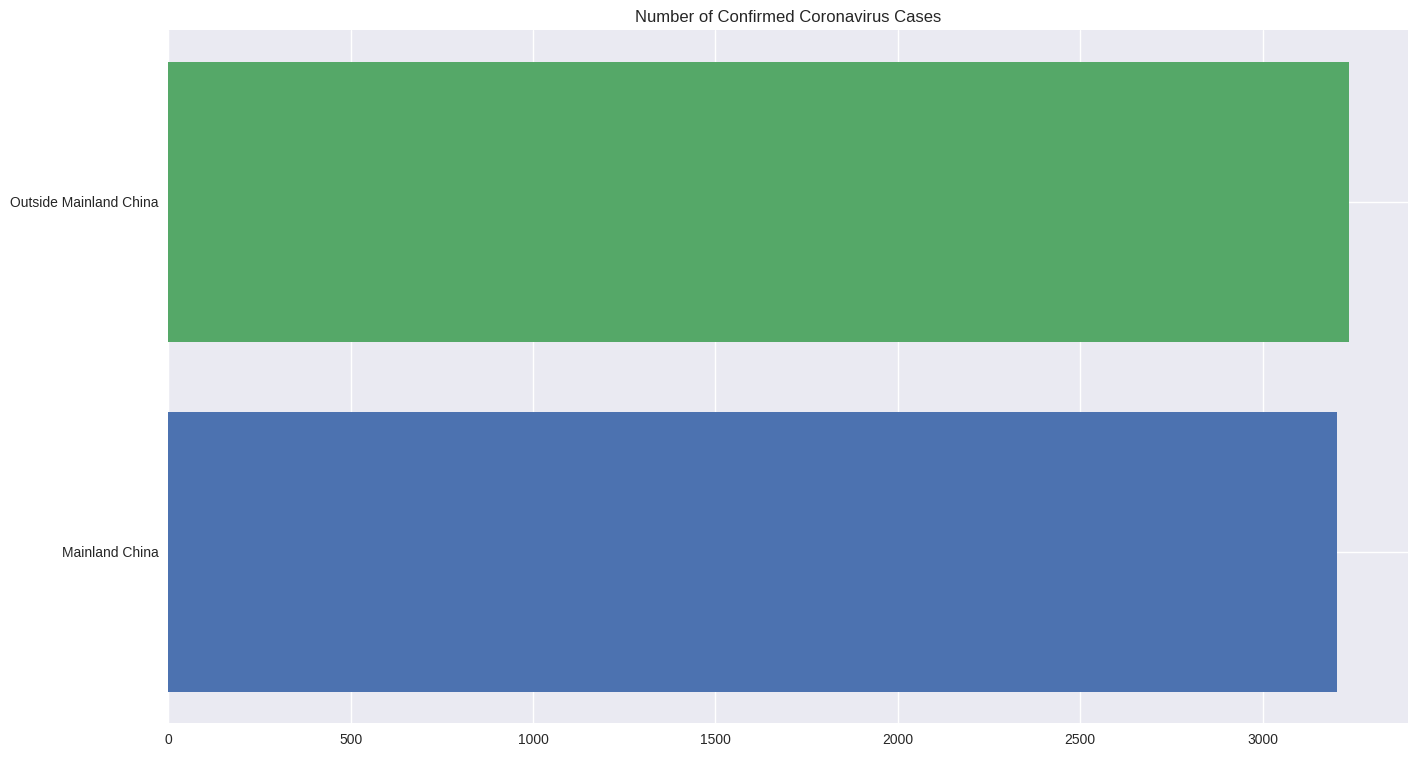

In [47]:
# Plot a bar graph to see the total confirmed cases between mainland china and outside mainland china 

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [48]:
# Print the total cases in mainland china and outside of it

print('Outside Mainland China {} cases:'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 3237 cases:
Mainland China: 3203 cases
Total: 6440 cases


In [49]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

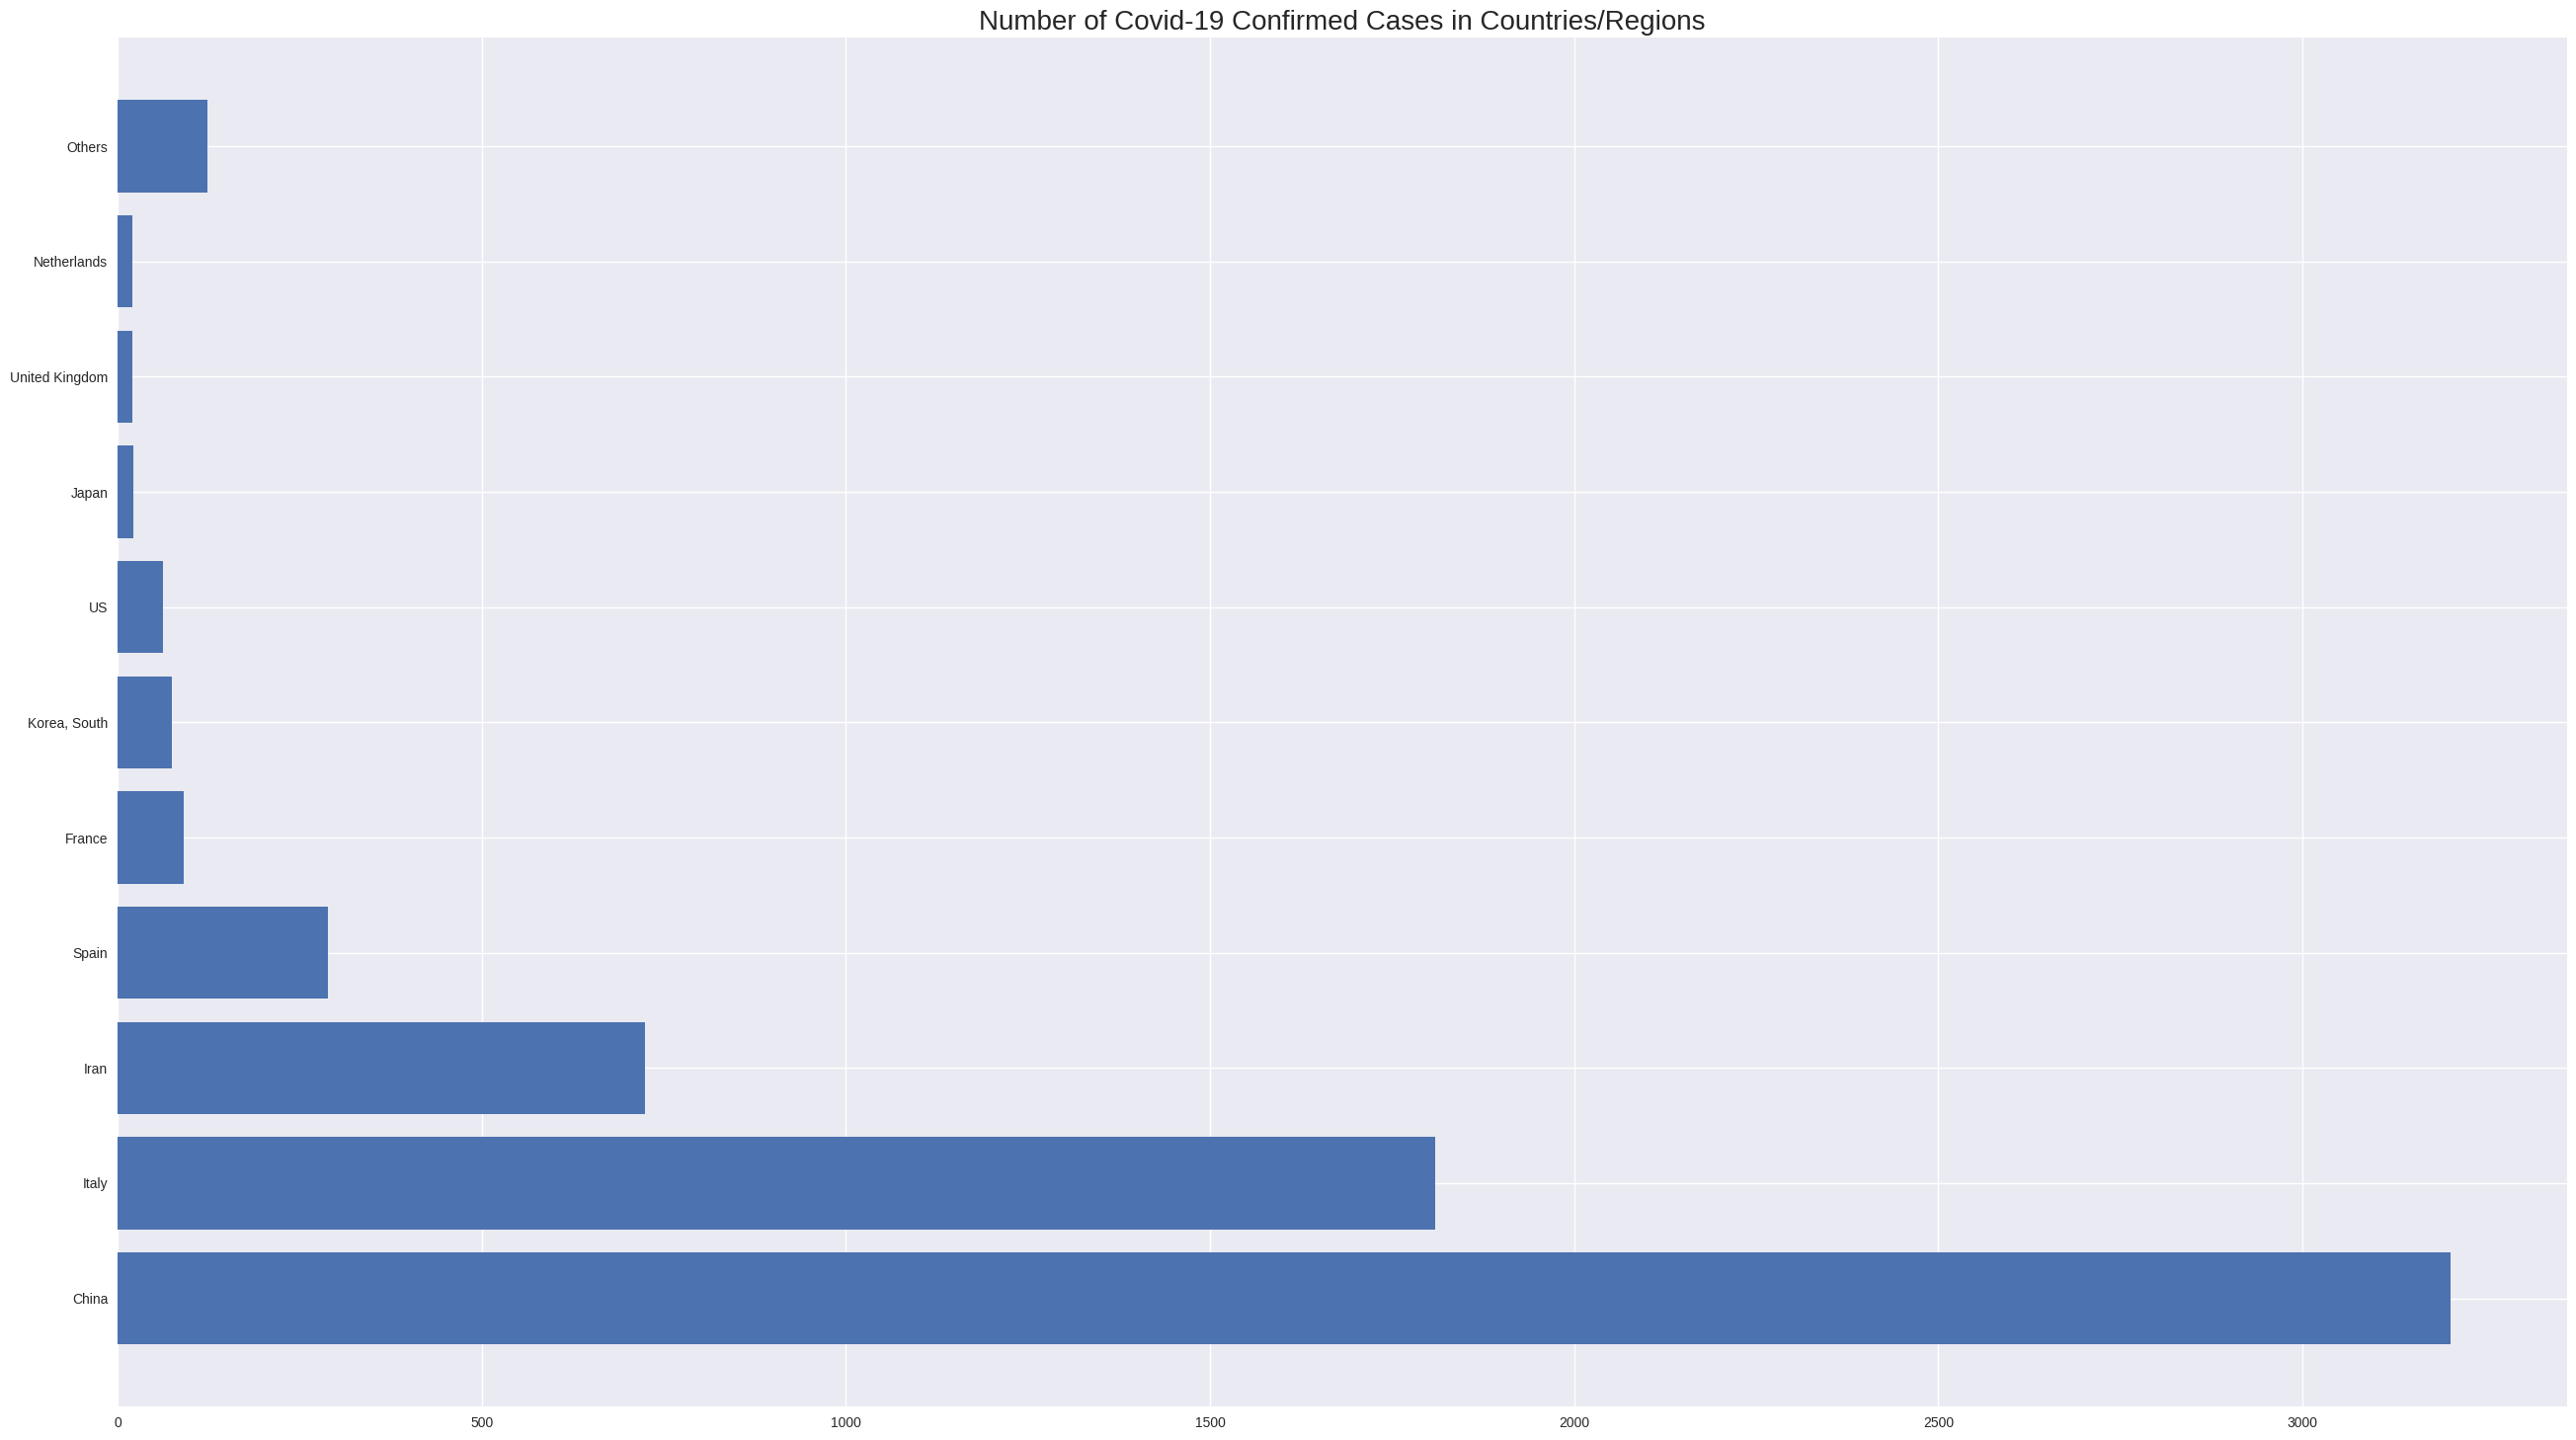

In [50]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

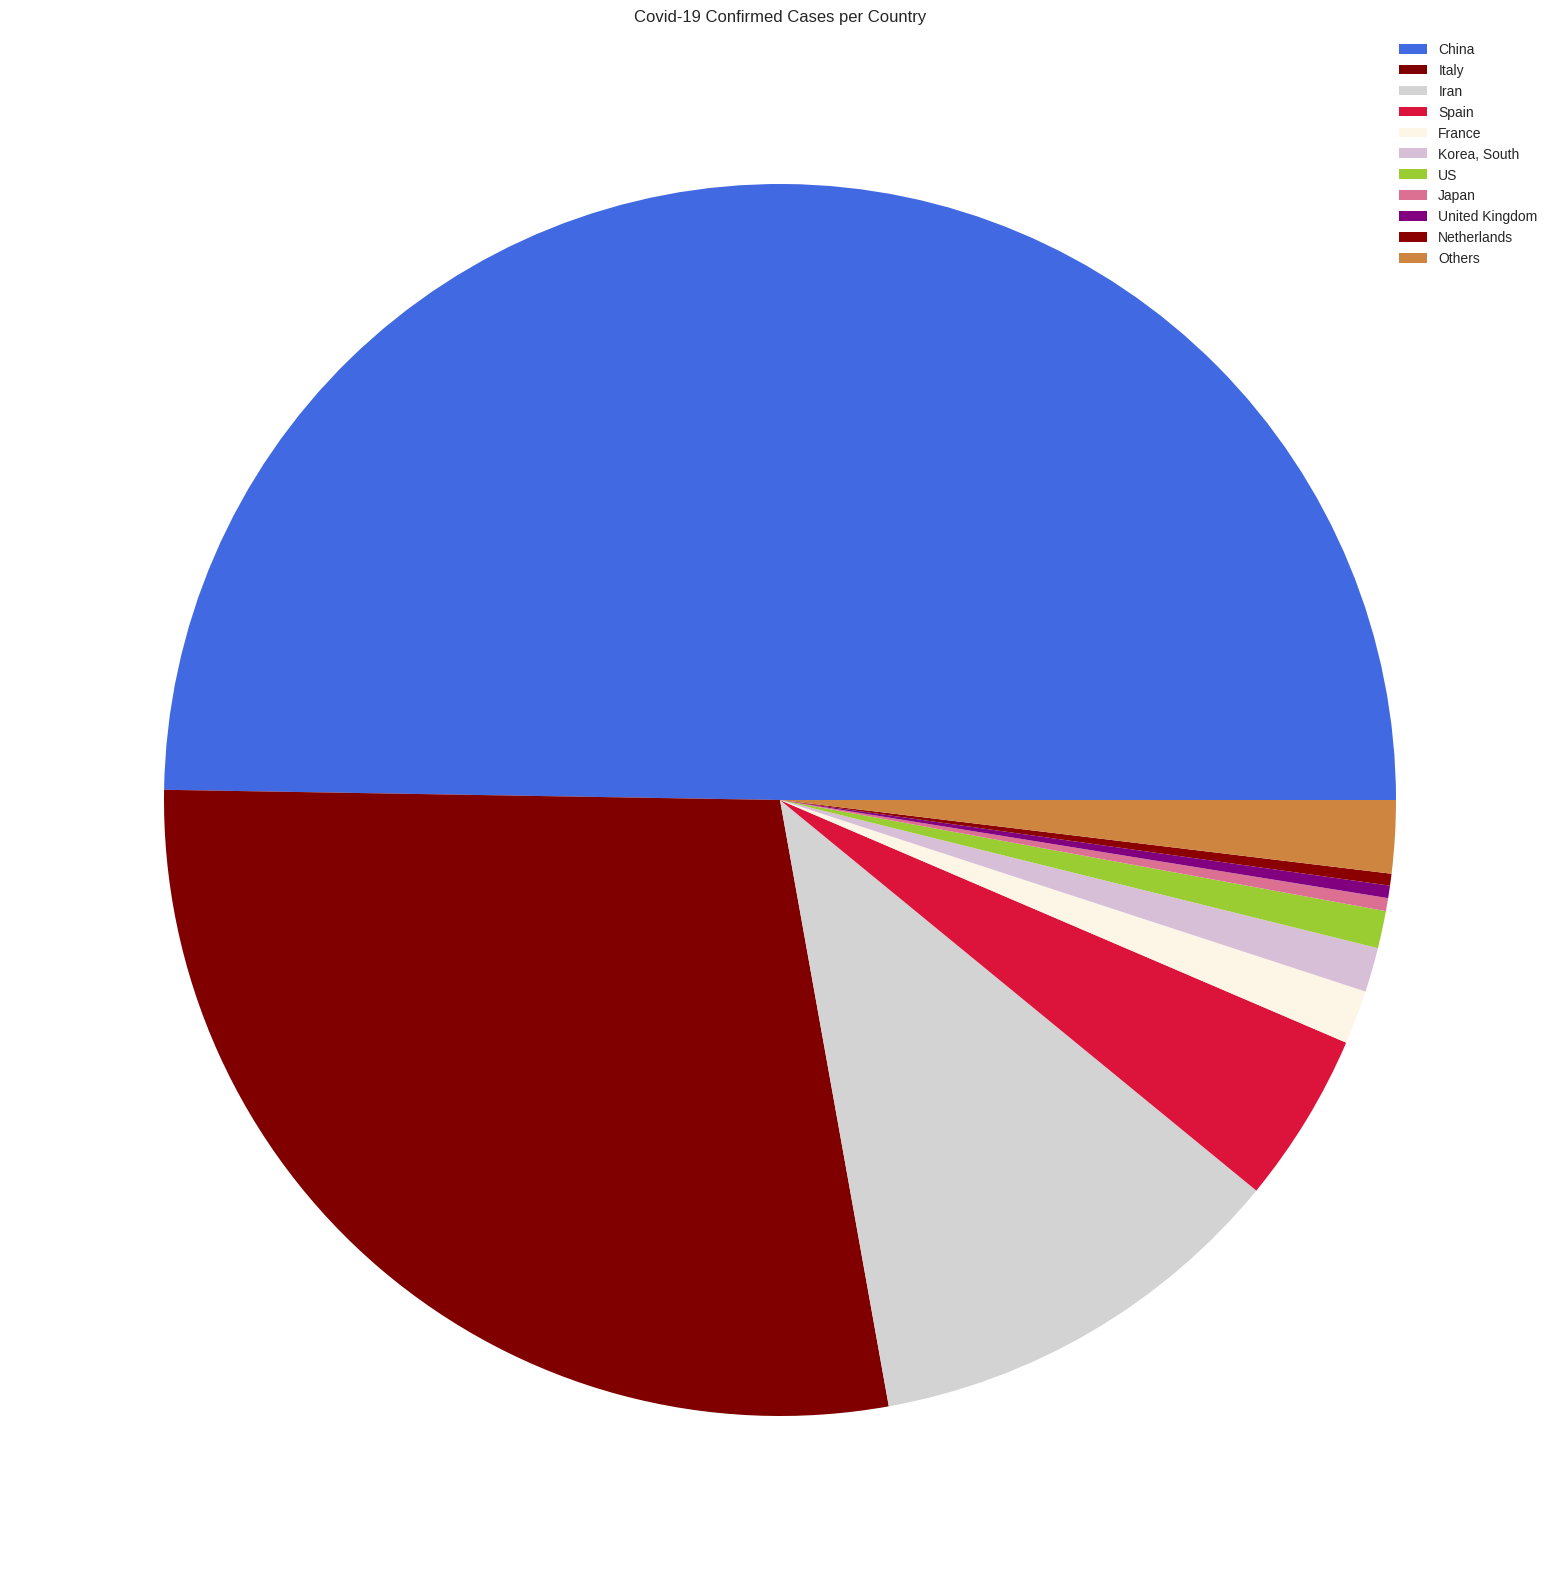

In [51]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

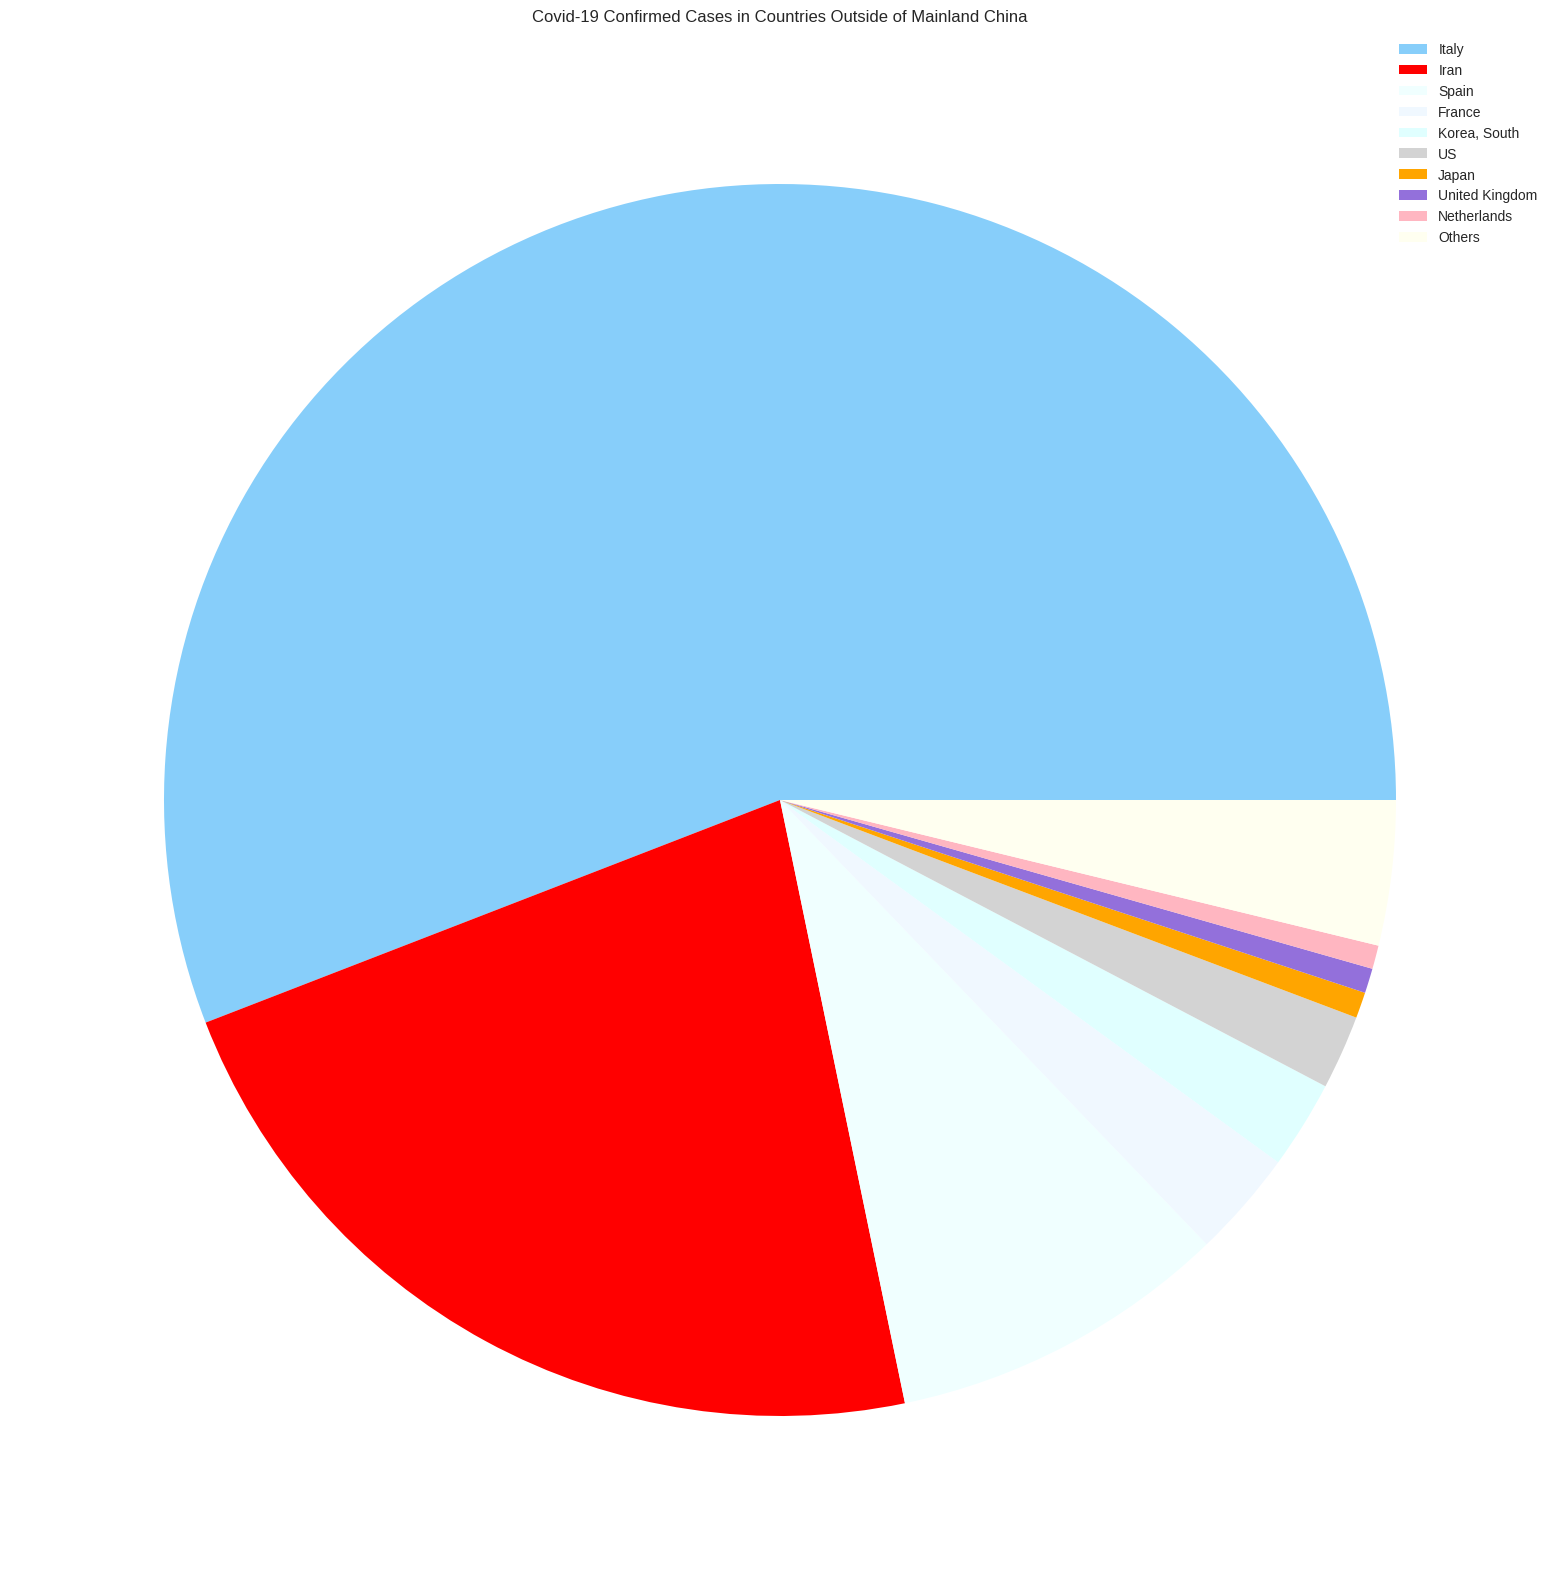

In [52]:
# Create a pie chart to see the total confirmed cases in 10 different countries outside China

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases in Countries Outside of Mainland China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

In [64]:
#from sklearn.svm import SVC
#svm_search = SVC(kernel='linear', C=1, random_state=42)
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load a dataset (e.g., the iris dataset)
data = datasets.load_iris()

# Split the data into features (X) and target values (y)
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the subset of training data that corresponds to the confirmed cases
X_train_confirmed = X_train[y_train == 1]
y_train_confirmed = y_train[y_train == 1]

In [65]:
# Building the SVM model

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [66]:
svm_search.best_params_

{'shrinking': False,
 'kernel': 'sigmoid',
 'gamma': 0.01,
 'epsilon': 0.1,
 'C': 10}

In [70]:
# Reshape future_forecast to have 4 columns
future_forecast_reshaped = np.reshape(future_forecast, (future_forecast.shape[0], 1))
future_forecast_reshaped = np.hstack((future_forecast_reshaped, future_forecast_reshaped, future_forecast_reshaped, future_forecast_reshaped))
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast_reshaped)

#svm_confirmed = svm_search.best_estimator_
#svm_pred = svm_confirmed.predict(future_forecast)

In [68]:
svm_confirmed

SVR(C=10, gamma=0.01, kernel='sigmoid', shrinking=False)

In [71]:
svm_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [75]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

NameError: ignored

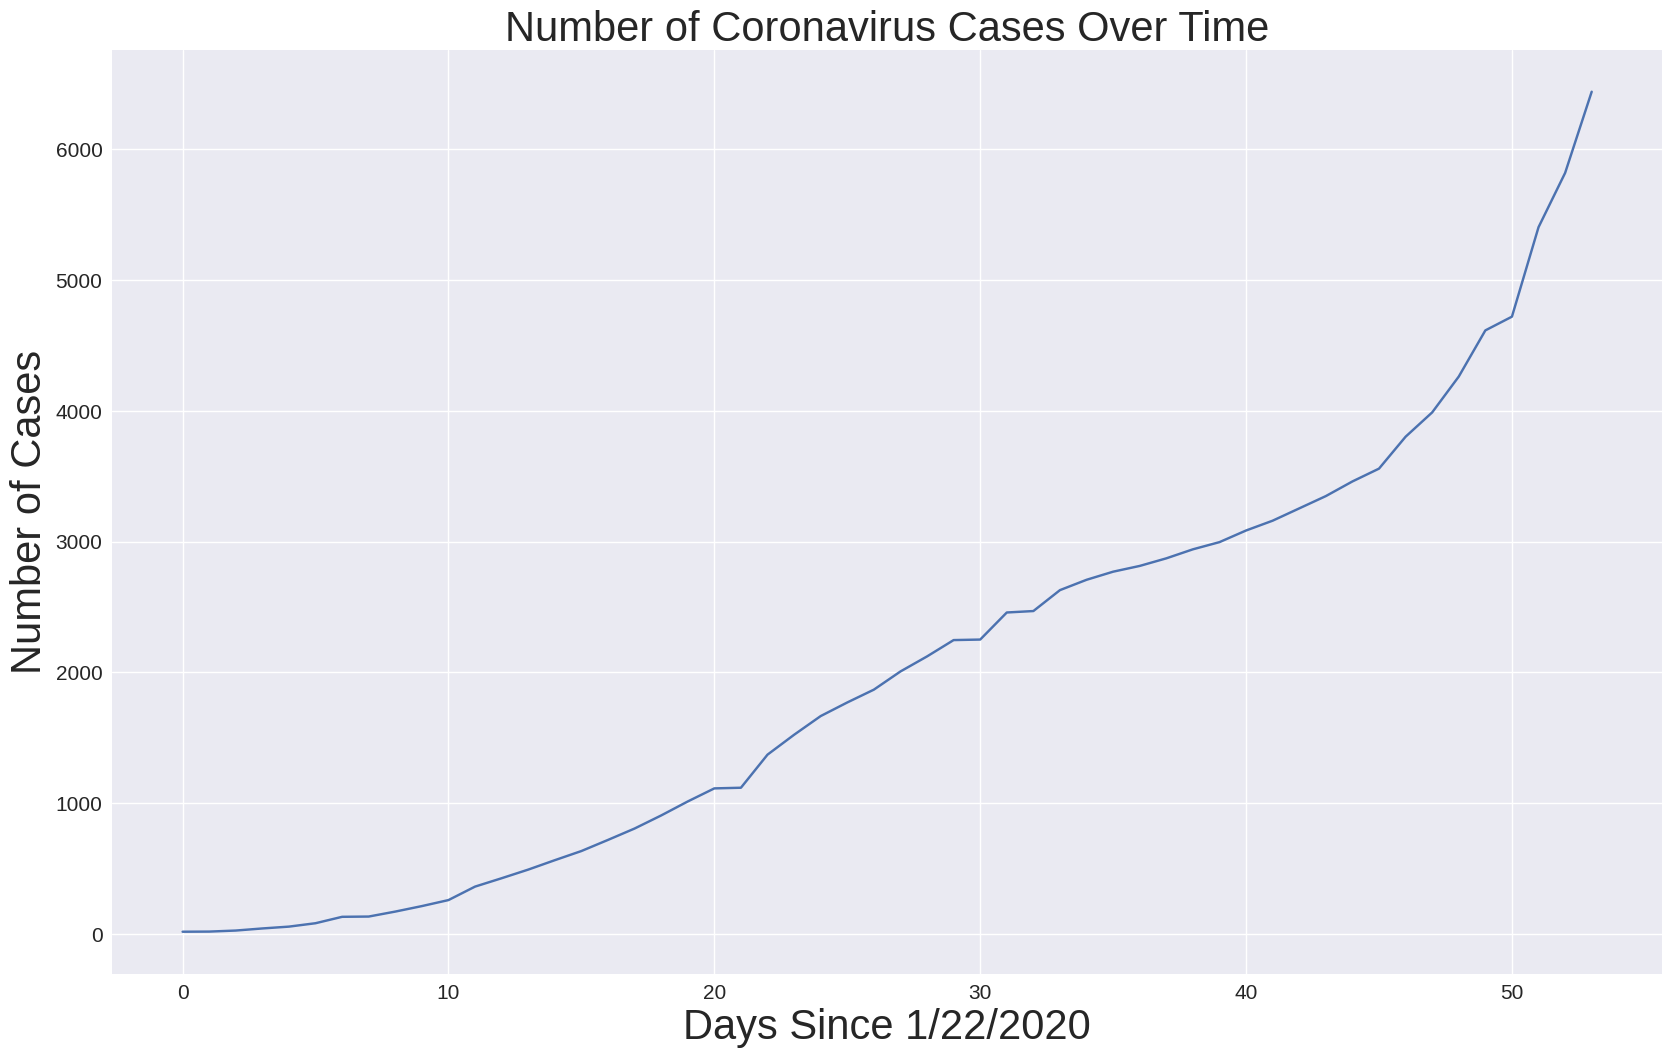

In [76]:
# Total Number of coronavirus cases over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


NameError: ignored

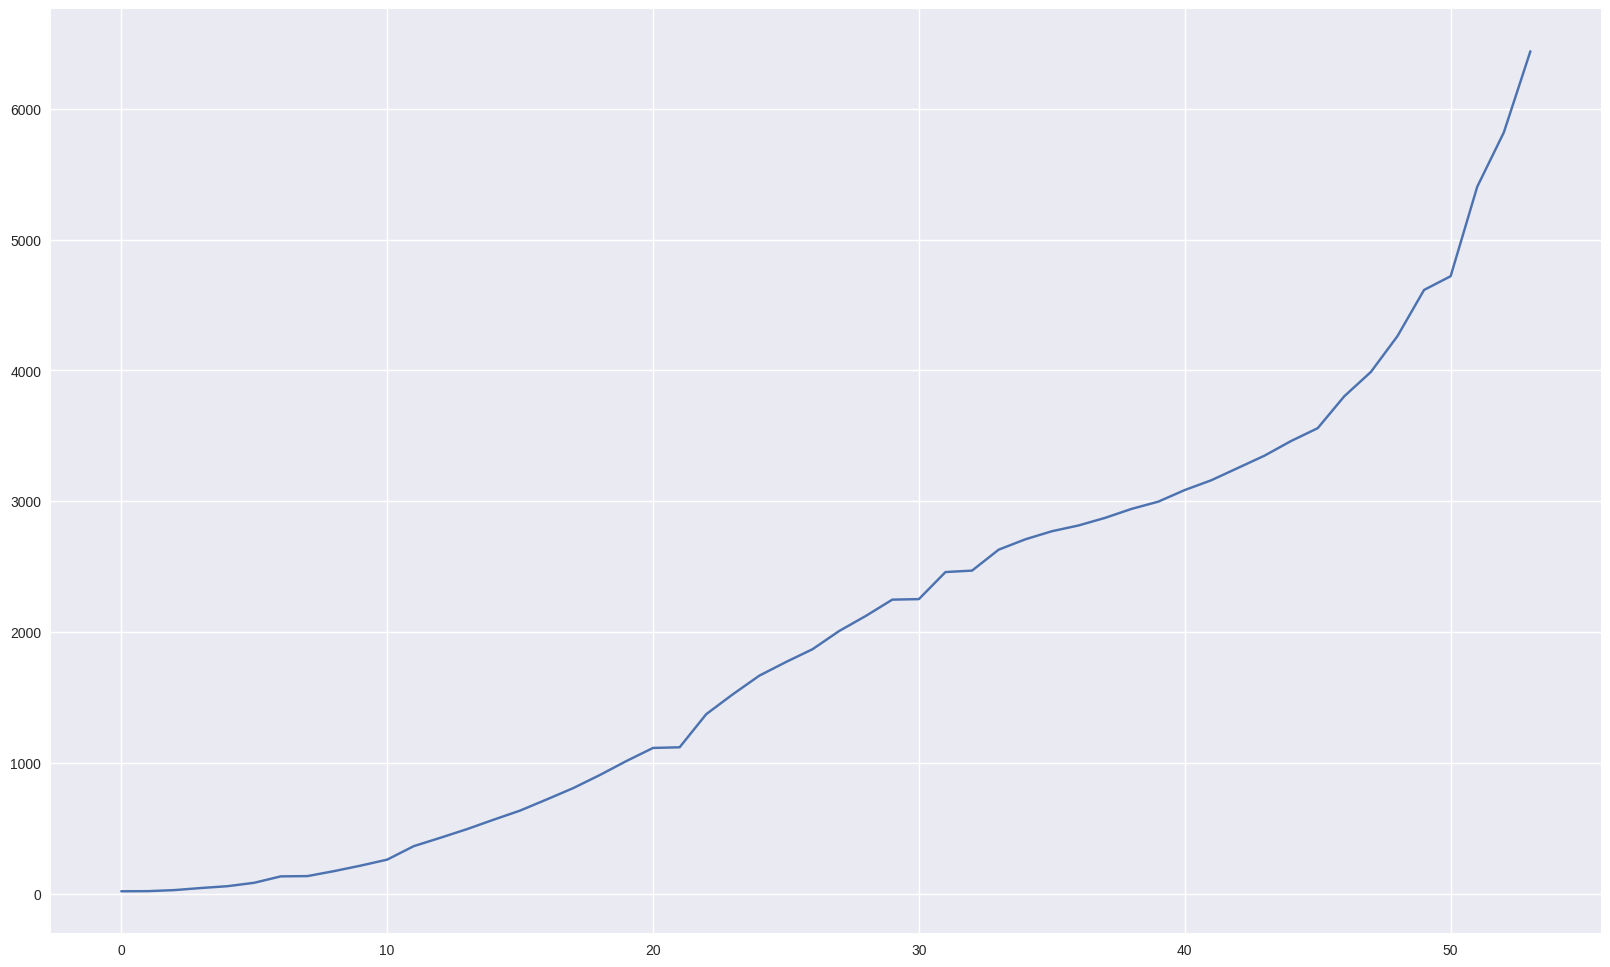

In [77]:
# Confirmed vs Predicted cases

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [78]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


set()

In [79]:
# Using Linear regression model to make predictions

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

TypeError: ignored

In [80]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

NameError: ignored

NameError: ignored

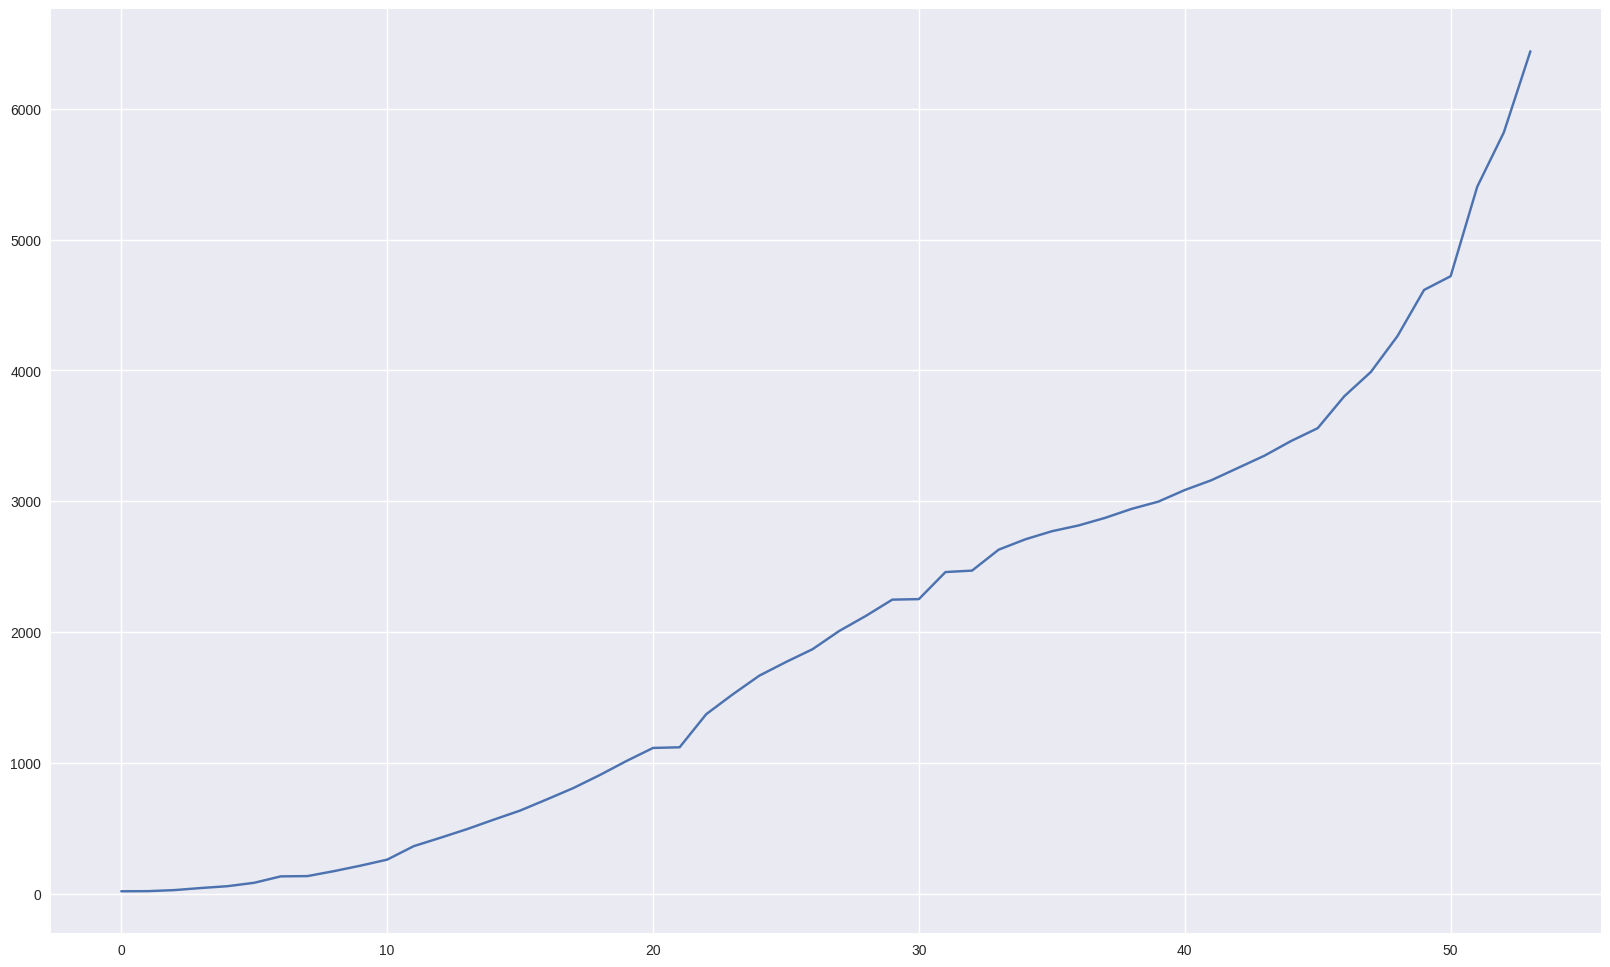

In [81]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [82]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:


NameError: ignored

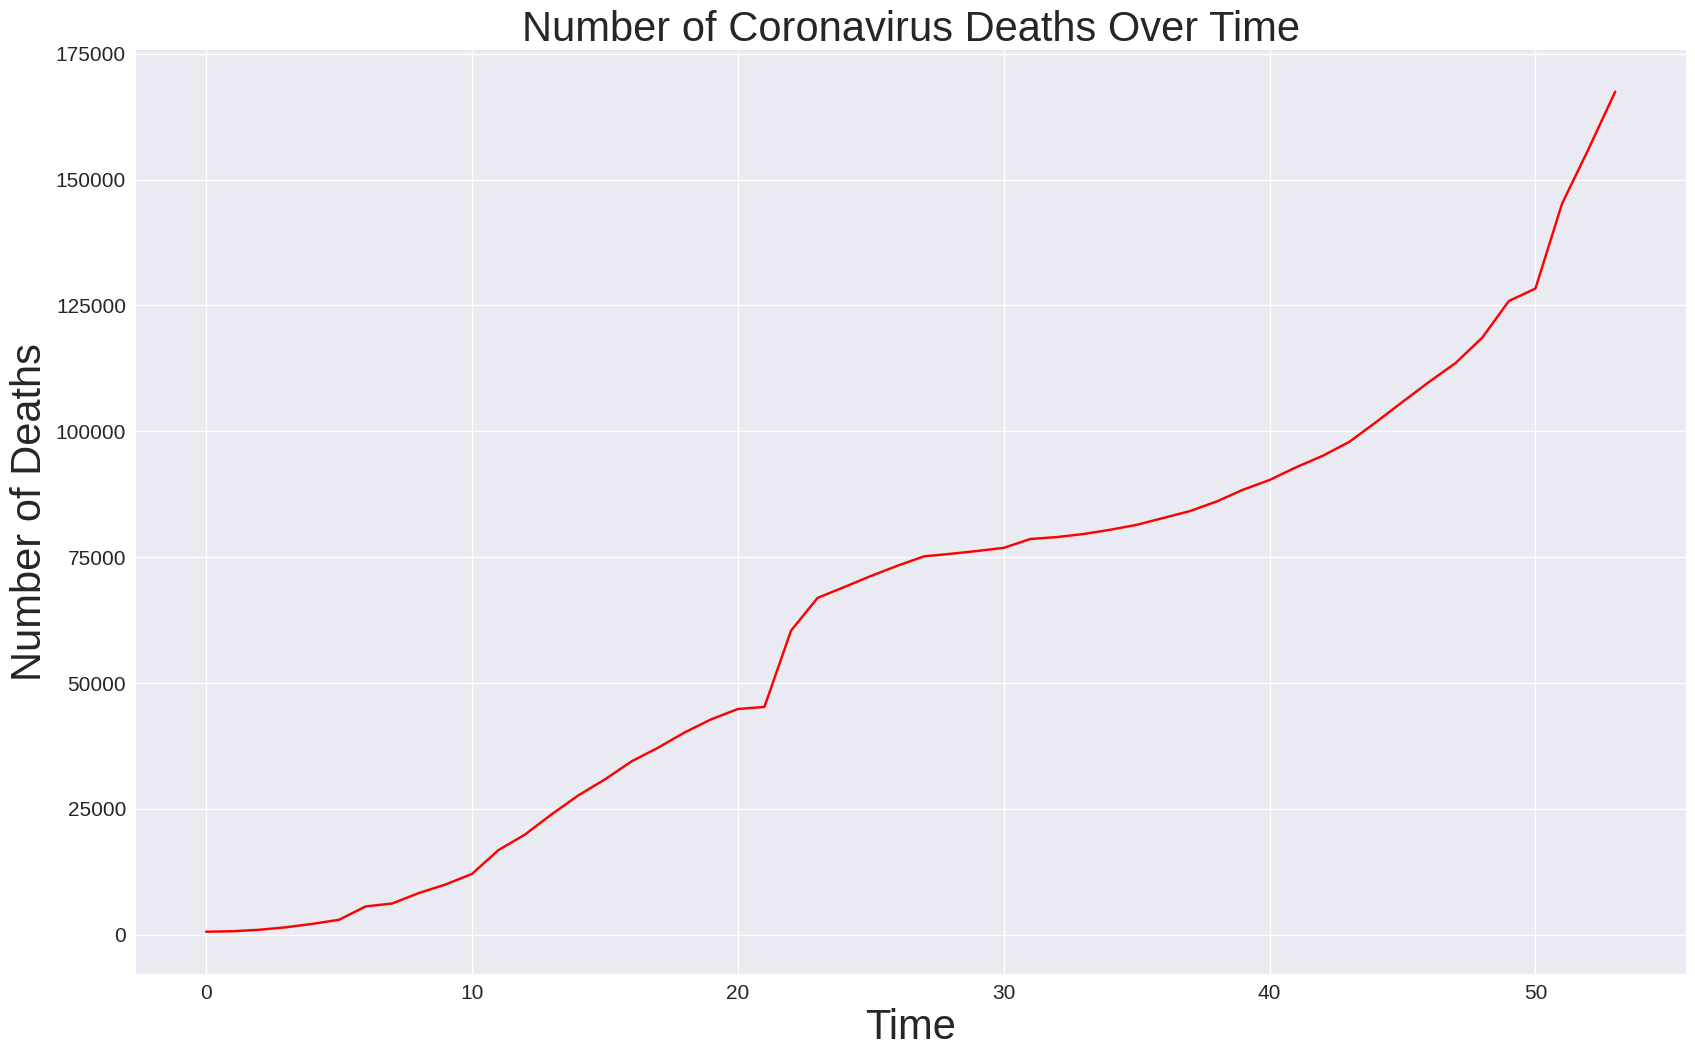

In [83]:
# Total deaths over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

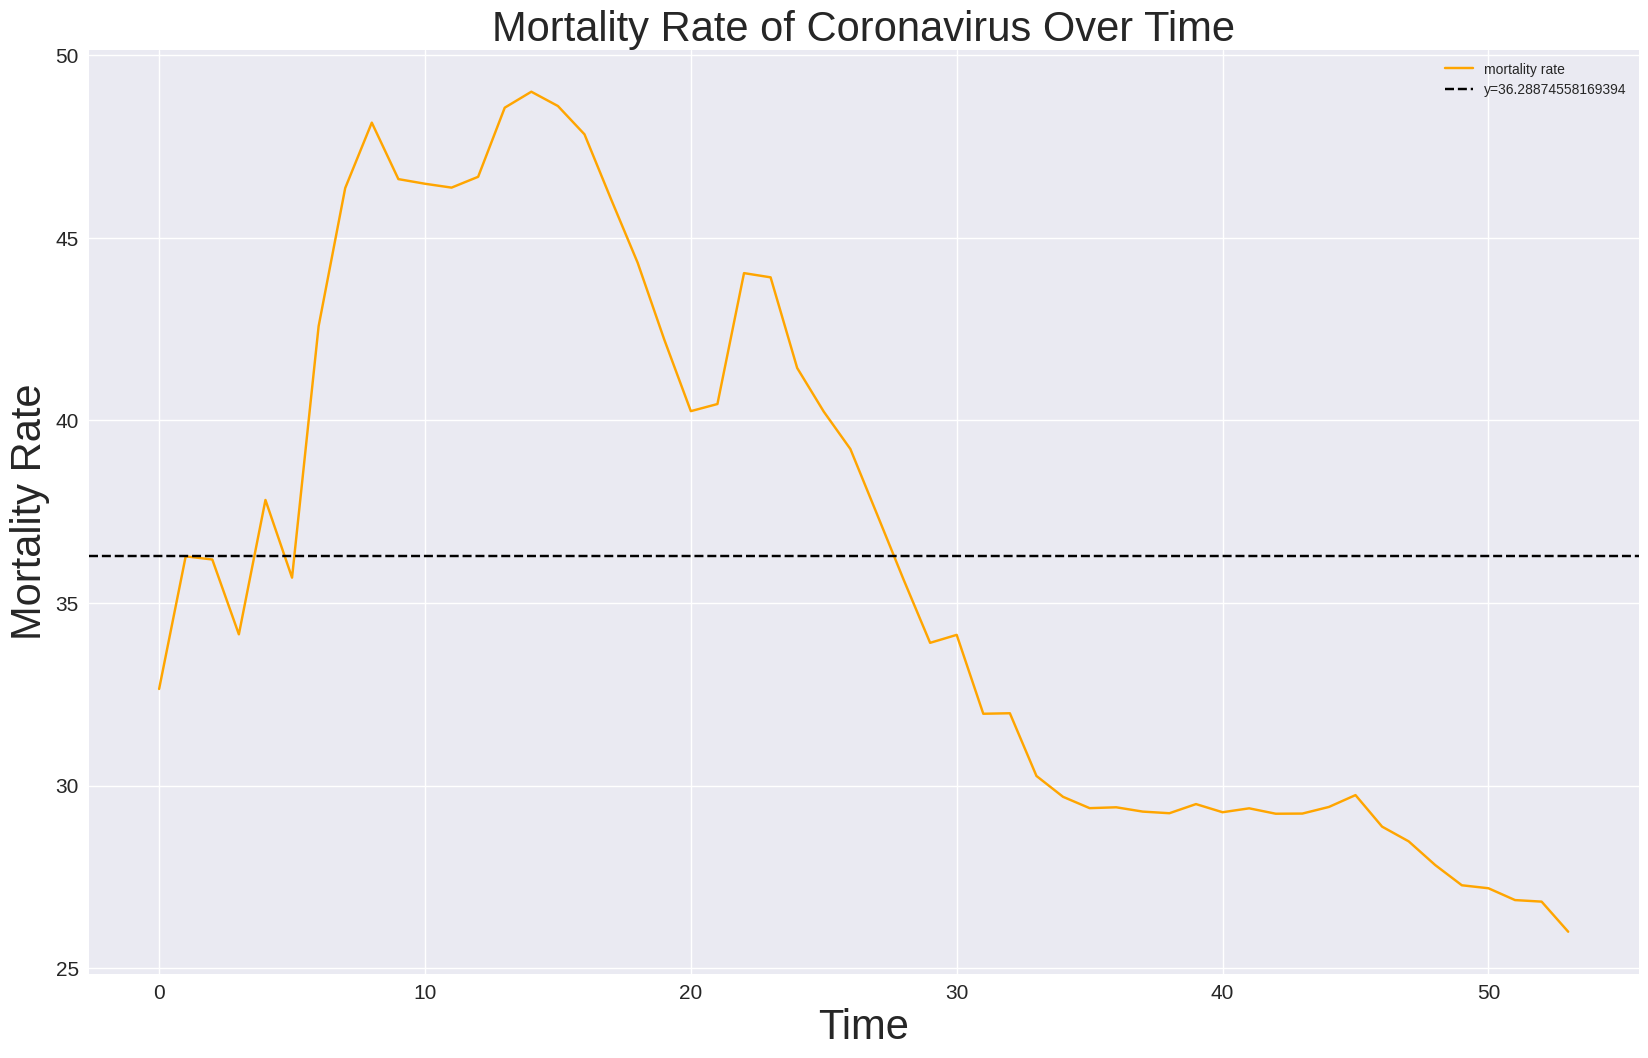

In [84]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

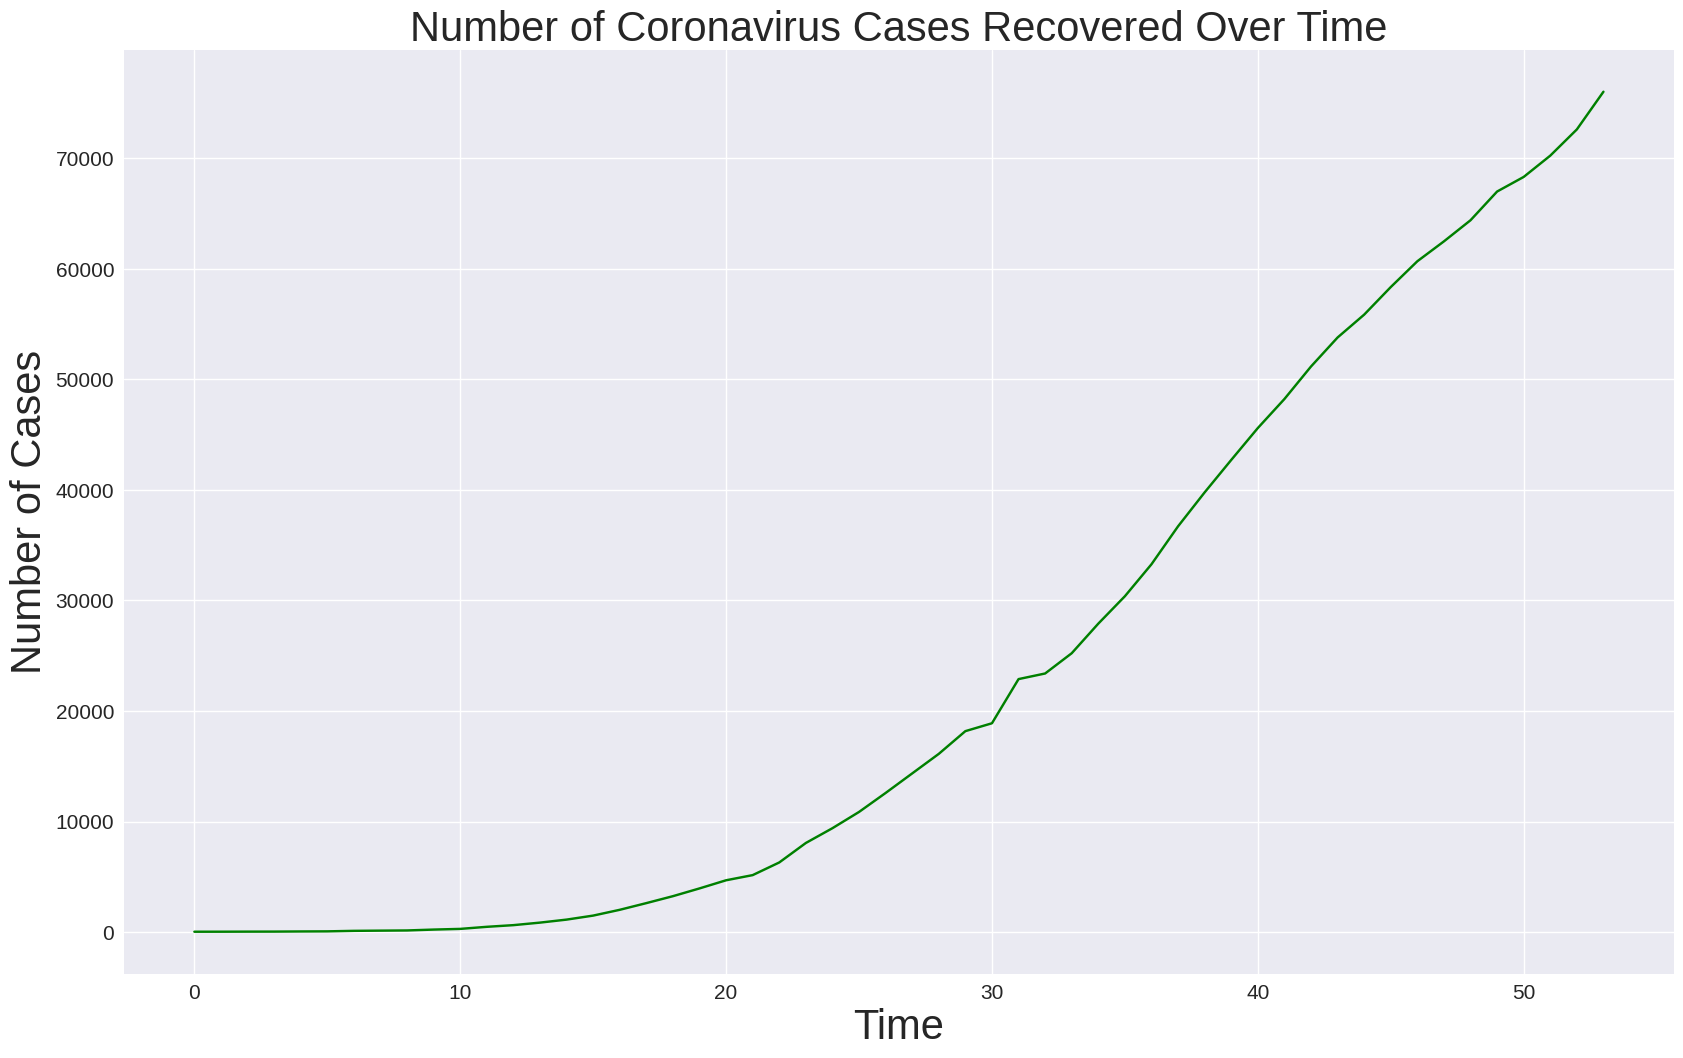

In [85]:
# Coronavirus Cases Recovered Over Time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

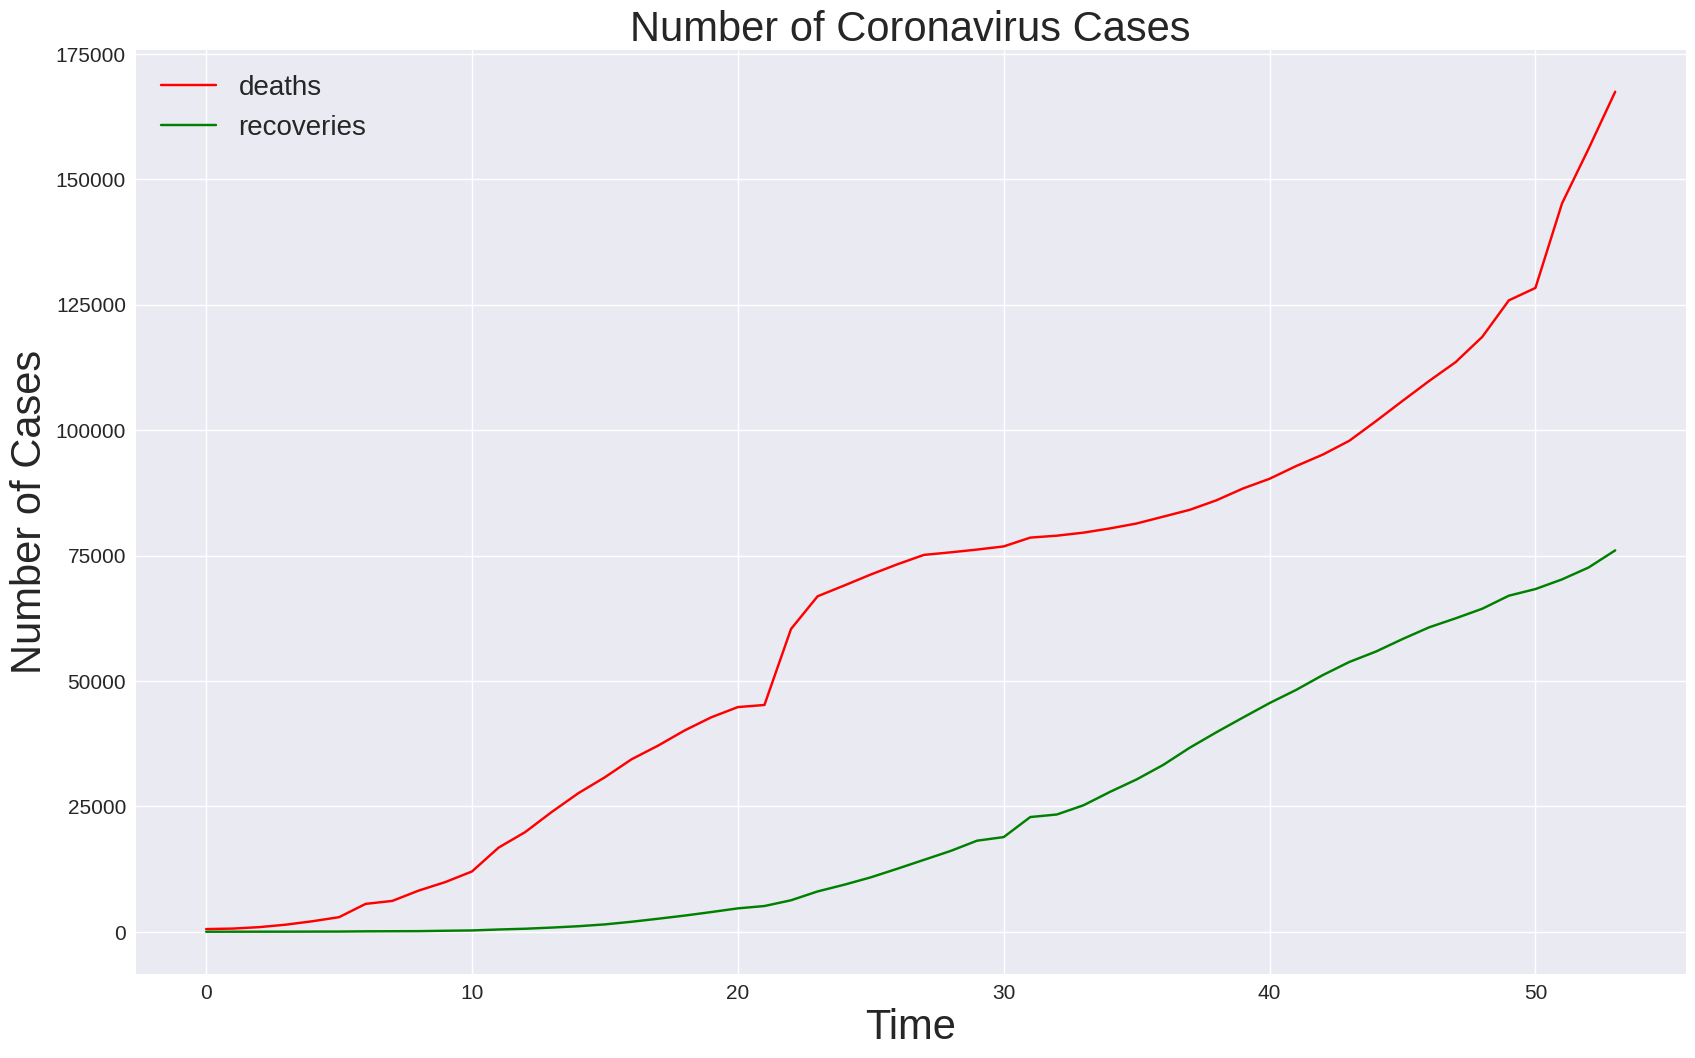

In [86]:
# Number of Coronavirus cases recovered vs the number of deaths 

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

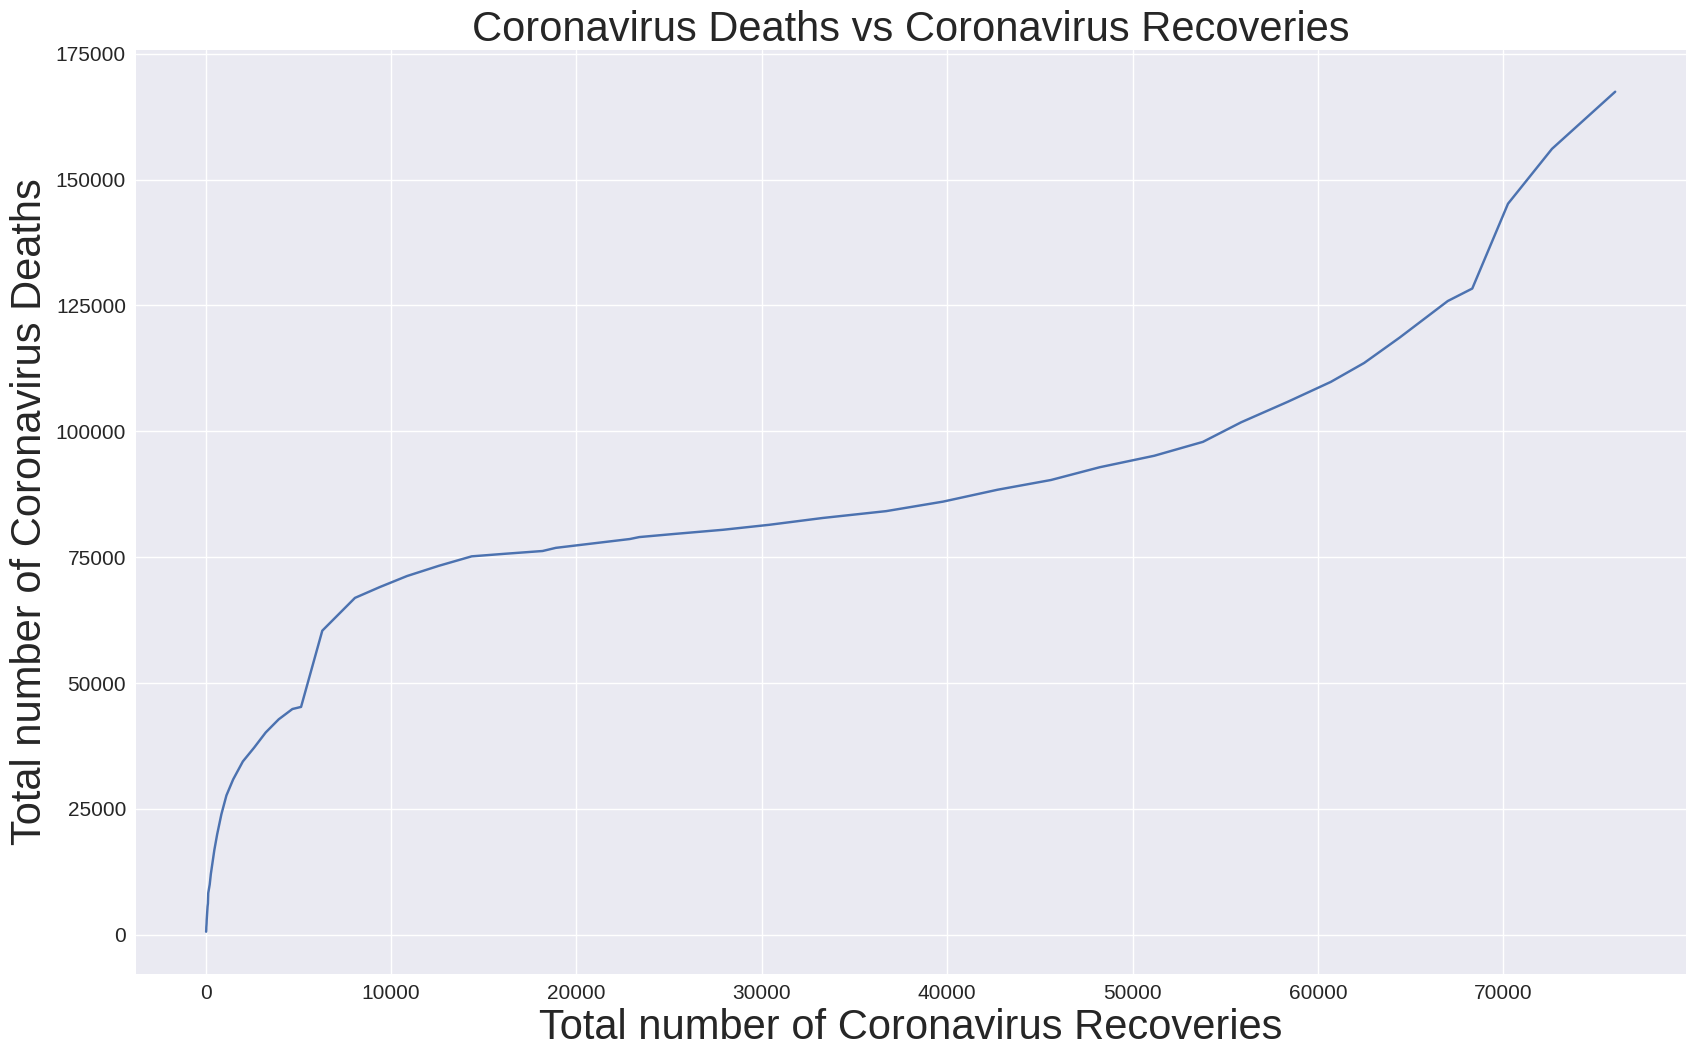

In [87]:
# Coronavirus Deaths vs Recoveries

plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Coronavirus Recoveries', size=30)
plt.xlabel('Total number of Coronavirus Recoveries', size=30)
plt.ylabel('Total number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

** This is the overall prediction model of Covid-19 by using the three data set files for prediction**
**Thank You**